# Bridge and Air Pollution in Mekong Delta
## Background
#### Mekong Delta in Vietnam is shaped around the Mekong River, splitting into 7 major branches. Previously, transportation between different sides of the rivers rely on ferry systems. However, due to increased in demands for more efficient transportation infastructure, major bridges were built to replace the existing ferry system. To analyze improvement in transportation efficiency, air pollutions before and after bridges are analyzed.  
| Bridge | Year |
| --- | --- |
| My Thuan | 2000|
| Rach Mieu | 2009 |
| Ham Luong | 2010 |
| Can Tho | 2010 |
| My Loi | 2015|
| Co Chien | 2015 |
| Cao Lanh | 2018 |
| Vam Cong | 2019 |

## Data Source and Cleaning
#### Air Pollution from transportation includes CO, NOx, and PM. Due to a lack of air quality sensor in Vietnam, I used remote sensing data of air pollution column density. I need dataset that spans at least 2009 - 2019 with the highest possible resolution and coverage. I have done preliminary analysis on NO2 and Aerosol data. I uploaded these dataset to google earth engine and calculate monthly mean for each dataset from 2007 to 2019.

### NO2
#### I used QA4ECV Project data, which uses combination of OMI, GOME, and SCIAMACHY datasets. The dataset spans from 2004 to now, with a spatial resolution 0.125 arc degrees (22 km) and a near daily temporal resolution. For low resolution NO2 dataset, I only need to extract the pixel value the bridge is in. For additional control, before and after bridge, I include neighboring pixels of the birdge pixel. 

### Aerosol
#### I used Modis terra and aqua dataset, which spans from 2000 to now, with a spatial resolution of 1km and a . Because of the high resolution, the bridge crosses through multiple pixels. Thus, I extract mean value over the bridge region. A concern I have is because of low temporal resolution and high cloud coverage in the summer months, there are many missing datas, thus the sample size to calculate monthly means differs my month. Additionally filtering of the data needs to explored


## Regression and Results
### Regression on NO2
$$
NO2 = \beta_0 + \beta_1 Bridge + \beta_2 Year + Month + Location (1)
$$

$$
NO2 = \beta_0 + \beta_1 Bridge + \beta_2 Year + Month (2)
$$

#### Bridge is a dummy variable that is 1 when the bridge is in operation, and 0 otherwise. Model has full month and location of the bridge fixed effects, or just month fixed effects. Bridge is estimated to decrease NO2 air column density. Its significance varies with the model specification. 

In [37]:
library(modelr)
library(haven)
library(tidyverse)
library(lfe)
library(stargazer)
datab <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/data/NO2.csv")
names(datab) <- c("NW", "W","SW", "N", "NO2", "S", "NE", "E", "SE", "date", "month", "quarter", "name", "year", "bridge", "ferry","pcr","pp","after", "ip", "burn", "dhcm")
datab
datab$date <- as.Date(datab$date)
datab$bridge_ferry <- datab$bridge + datab$ferry
reg1 <- felm(NO2 ~ bridge + year| month, datab)
reg2 <- felm(NO2 ~ bridge + year| month + name, datab)
reg3 <- felm(NO2 ~ bridge + year| quarter, datab)
reg4 <- felm(NO2 ~ bridge + year| quarter + name, datab)
reg5 <- felm(NO2 ~ bridge + year + ferry| month, datab)
reg6 <- felm(NO2 ~ bridge + year + ferry| month + name, datab)
reg7 <- felm(NO2 ~ bridge + year + ferry + bridge_ferry| month + name, datab)
stargazer(reg1,reg2,reg3,reg4, type = "text")
stargazer(reg5,reg6,reg7, type = "text")

NW,W,SW,N,NO2,S,NE,E,SE,date,⋯,name,year,bridge,ferry,pcr,pp,after,ip,burn,dhcm
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
164,173,141,159,167,132,162,150,148,2007-01-01T00:00:00,⋯,Can Tho,2007,0,1,0.3359966,1,-3,2,0,166400
138,117,125,136,114,110,128,109,111,2007-02-01T00:00:00,⋯,Can Tho,2007,0,1,0.3359966,1,-3,2,1,166400
207,185,175,174,165,148,156,162,132,2007-03-01T00:00:00,⋯,Can Tho,2007,0,1,0.3359966,1,-3,2,1,166400
179,164,120,173,159,113,162,161,134,2007-04-01T00:00:00,⋯,Can Tho,2007,0,1,0.3359966,1,-3,2,0,166400
96,119,119,99,136,130,124,140,123,2007-05-01T00:00:00,⋯,Can Tho,2007,0,1,0.3359966,1,-3,2,0,166400
162,144,154,172,141,158,149,108,138,2007-06-01T00:00:00,⋯,Can Tho,2007,0,1,0.3359966,1,-3,2,0,166400
128,122,96,120,120,100,127,129,97,2007-07-01T00:00:00,⋯,Can Tho,2007,0,1,0.3359966,1,-3,2,0,166400
87,81,86,107,106,95,123,114,108,2007-08-01T00:00:00,⋯,Can Tho,2007,0,1,0.3359966,1,-3,2,1,166400
178,136,126,171,122,127,142,113,101,2007-09-01T00:00:00,⋯,Can Tho,2007,0,1,0.3359966,1,-3,2,1,166400


Warning message in chol.default(mat, pivot = TRUE, tol = tol):
“the matrix is either rank-deficient or indefinite”



                                                Dependent variable:                            
                    ---------------------------------------------------------------------------
                                                        NO2                                    
                           (1)                (2)                (3)                (4)        
-----------------------------------------------------------------------------------------------
bridge                  -6.523***            -4.316           -6.620***            -4.546      
                         (2.499)            (3.445)            (2.543)            (3.523)      
                                                                                               
year                     2.287***           2.145***           2.294***           2.160***     
                         (0.333)            (0.344)            (0.339)            (0.352)      
                                       

#### To add more control to regression, I add percentage of rice paddy in the pixel, distance to the nearest power plant, and new operating power plants
$$
NO2 = \beta_0 + \beta_1 Bridge + \beta_2 Year + \beta_3 riceburning*year + \beta_4 number of operating powerplants + Month + Location (F1)
$$

$$
NO2 = \beta_0 + \beta_1 Bridge + \beta_2 Year*percent rice + \beta_3 number of operating powerplants + Month (F2)
$$

$$
NO2 = \beta_0 + \beta_1 Bridge + \beta_2 Year + \beta_3 number of operating powerplants + \beta_4 industrial parks * year + \beta_5 riceburning * year + Month + Location (F3)
$$


In [66]:
datam <- datab[-which(datab$name == "My Loi"),]
datam$rby <- datam$pcr * datam$burn * datam$year
datam$ipy <- datam$ip * datam$year #need to modify when the park is completed
datam$hy <- datam$dhcm * datam$year
regf1 <- felm(NO2 ~ bridge + year + rby + pp |month + name, datam) #just test regression because pcr and dpp does not change by year
regf2 <- felm(NO2 ~ bridge + year + pp| month + name, datam) # base value times the year fixed effects as modeled by a paper about roads and forest cover loss
regf3 <- felm(NO2 ~ bridge + year + pp + rby + hy + ipy| month + name, datam) #need to add a time of when industrial park is completed
stargazer(regf1,regf2,regf3, type = "text")



                                      Dependent variable:                  
                    -------------------------------------------------------
                                              NO2                          
                           (1)                (2)                (3)       
---------------------------------------------------------------------------
bridge                   -6.741*            -6.757*            -2.522      
                         (3.632)            (3.642)            (3.886)     
                                                                           
year                      0.709              0.712              0.799      
                         (0.715)            (0.717)            (1.234)     
                                                                           
rby                      0.017***                             0.019***     
                         (0.006)                               (0.007)     
           

Plot residual map (I am not very sure how to do this)

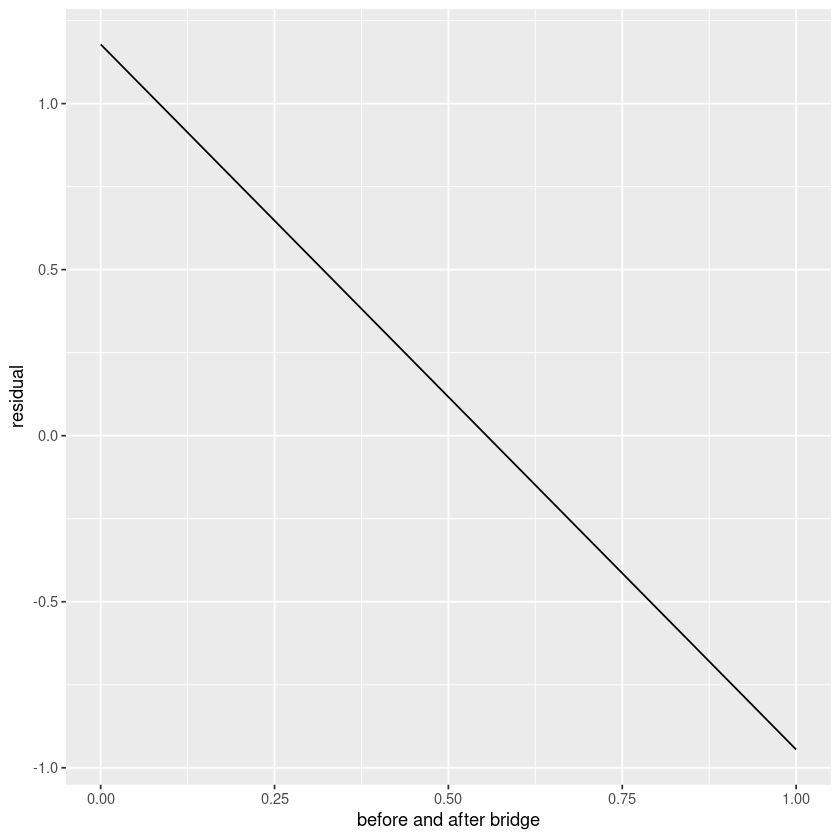

In [63]:
regr <- lm(NO2 ~ year + pp + rby + factor(month) + factor(name), datam)#dropping bridge dummy variable
datar <- datam %>% add_residuals(regr) %>% group_by(bridge) %>% summarise(m = mean(resid), q25 = quantile(resid, c(0.25)), q75 = quantile(resid, c(0.75)))

#b_residual <- residuals(regr)
#datab$r <- b_residual
ggplot() + geom_line(data = datar, aes(x = bridge, y = m)) + ylab("residual") + xlab("before and after bridge") #+ geom_line(data = datar, aes(x = bridge, y = q25))# + geom_point(data = datar, aes(x = bridge, y = q75))


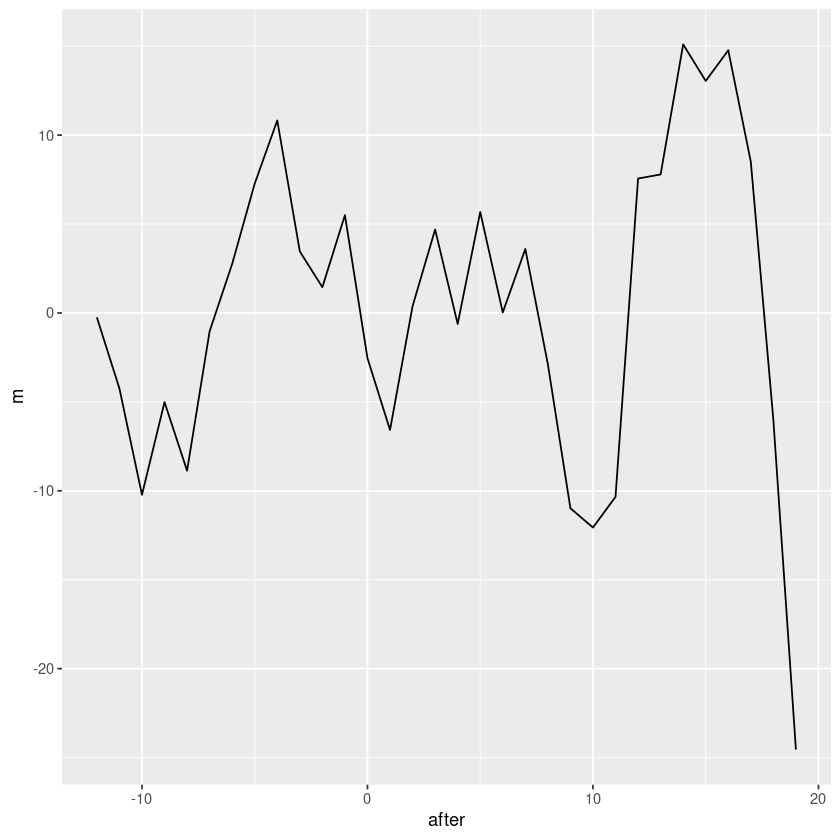

In [53]:
datayr <- datam %>% add_residuals(regr) %>% group_by(after) %>% summarise(m = mean(resid))
ggplot() + geom_line(data = datayr, aes(x = after, y = m))


#### This decrease is potentially due to decrease in emission from ferries due to closure of ferries. Therefore, we will add control pixels before and after bridge to eliminate the effect of the ferries. The first test control I did is create 3x3 neighborhood around the bridge pixel. Calculating mean No2 of the neighborhod and regress them like the equations above. the results are not statistically significant from zero.

In [78]:
datab$meancontrol <- (datab$N + datab$NW + datab$W + datab$SW + datab$S + datab$NE + datab$E + datab$SE)/8
datab$meantotal <- (datab$N + datab$NW + datab$W + datab$SW + datab$S + datab$NE + datab$E + datab$SE + datab$NO2)/9
regmc <- felm(meancontrol ~ bridge+ year|name + month, datab)
regmt <- felm(meantotal ~ bridge+ year|name + month, datab)
stargazer(regmc, regmt, type = "text")


                                    Dependent variable:     
                                ----------------------------
                                  meancontrol    meantotal  
                                      (1)           (2)     
------------------------------------------------------------
bridge                              -0.462         -0.890   
                                    (2.942)       (2.969)   
                                                            
year                               1.782***       1.823***  
                                    (0.294)       (0.296)   
                                                            
------------------------------------------------------------
Observations                         1,248         1,248    
R2                                   0.418         0.413    
Adjusted R2                          0.409         0.403    
Residual Std. Error (df = 1227)     29.594         29.861   
Note:                  

#### Because of the big neighborhood, the effect might be diluted. Thus we also choose two pixels with the highest averages over the entire time period 2007 - 2019 and regress them similarly. The results are not statistically significant from zero. 


In [79]:
# Make a dataset with the two highest averages in the neighborhood
n <- list("NW", "W","SW", "N", "S", "NE", "E", "SE")
b <- unique(datab$name)
mn <- list()
datan <- data.frame()
for (i in b) {
  datasub <- datab[datab$name == i, ]
  for (i in n) {
    m <- mean(datasub[[i]])
    mn[[i]] <- m
  }
  m1 <- which.max(mn)
  m2 <- names(which.max(mn[- get("m1")]))
  keep <- c(names(m1), m2, "NO2", "date", "month", "name", "year", "bridge")
  datasub2 <- datasub[keep]
  names(datasub2) <- c("m1", "m2", "NO2", "date", "month", "name", "year", "bridge")
  datan <- rbind(datan,datasub2)
}
#Calculate the the mean of the before and after bridge, including or not including bridge pixel. 
datan$meancontrol <- (datan$m1 + datan$m2)/2
datan$meantotal <- (datan$m1 + datan$m2 + datan$NO2)/3
regm1a <- felm(m1 ~ bridge + year |name + month, datan)
regm1b <- felm(m1 ~ bridge + year |month, datan)
regm2a <- felm(m2 ~ bridge + year |name + month, datan)
regm2b <- felm(m2 ~ bridge + year |month, datan)
regmmtf <- felm(meantotal~ bridge + year | month + name, datan)
regmmt <- felm(meantotal~ bridge + year | month, datan)
regmmcf <- felm(meancontrol~ bridge + year | month + name, datan)
regmmc <- felm(meancontrol~ bridge + year | month , datan)
stargazer(regm1a, regm2a, regm2a, regm2b, type = "text")
stargazer(regmmt, regmmtf, regmmcf, regmmc, type = "text")


                                                Dependent variable:                            
                    ---------------------------------------------------------------------------
                            m1                                    m2                           
                           (1)                (2)                (3)                (4)        
-----------------------------------------------------------------------------------------------
bridge                    -0.949             -1.522             -1.522             -3.207      
                         (3.699)            (3.735)            (3.735)            (2.901)      
                                                                                               
year                     2.106***           2.297***           2.297***           2.406***     
                         (0.369)            (0.373)            (0.373)            (0.387)      
                                       

### Regression on Aerosol Optical Depth
$$
AOD = \beta_0 + \beta_1 Bridge + \beta_2 Year + Month + Location (1)
$$
$$
AOD = \beta_0 + \beta_1 Bridge + \beta_2 Year + Month (2)
$$
$$
AOD = \beta_0 + \beta_1 Bridge + \beta_2 Year + \beta_3 number of operating powerplants + Month + Location(3)
$$
$$
AOD = \beta_0 + \beta_1 Bridge + \beta_2 Year + \beta_3 number of operating powerplants + Month (4)
$$
$$
NO2 = \beta_0 + \beta_1 Bridge + \beta_2 Year + \beta_3 distance to closest powerplant + \beta_4 number of operating powerplants + Month (5)
$$

#### Results for Aerosols is opposite to that of NO2. Bridges are estimated to increase AOD.

In [15]:
# AOD estimated from Blue Band
data47 <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/data/Aerosol047.csv")
data47$date <- as.Date(data47$date)
rega1 <- felm(mean ~ year + bridge |name + month, data47) 
rega2 <- felm(mean ~ year + bridge | month, data47)
rega3 <- felm(mean ~ year + bridge + pp | name + month, data47)
rega4 <- felm(mean ~ year + bridge + pp |  month, data47)
rega5 <- felm(mean ~ year + bridge + distancepp + pp | month, data47) #just testing out the distance to powerplants
stargazer(rega1, rega2, rega3, rega4, rega5, type = "text")


                                                            Dependent variable:                                        
                    ---------------------------------------------------------------------------------------------------
                                                                   mean                                                
                            (1)                 (2)                 (3)                 (4)                 (5)        
-----------------------------------------------------------------------------------------------------------------------
year                       1.000               0.335               0.304              -0.107              -0.160       
                          (1.409)             (1.308)             (2.214)             (2.240)             (2.402)      
                                                                                                                       
bridge                    20.199       

In [16]:
#AOD estimated from green band
data55 <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/data/Aerosol055.csv")
data55$date <- as.Date(data55$date)
rega51 <- felm(mean ~ year + bridge |name + month, data55) 
rega52 <- felm(mean ~ year + bridge | month, data55) 
rega53 <- felm(mean ~ year + bridge + pp | name + month, data55)
rega54 <- felm(mean ~ year + bridge + pp |  month, data55)
rega55 <- felm(mean ~ year + bridge + distancepp + pp | month, data55) #just testing out the distance to powerplants
stargazer(rega51, rega52, rega53, rega54, rega55, type = "text")



                                                            Dependent variable:                                        
                    ---------------------------------------------------------------------------------------------------
                                                                   mean                                                
                            (1)                 (2)                 (3)                 (4)                 (5)        
-----------------------------------------------------------------------------------------------------------------------
year                       0.739               0.261               0.245              -0.051              -0.098       
                          (1.029)             (0.954)             (1.618)             (1.635)             (1.752)      
                                                                                                                       
bridge                    14.478       

In [18]:
datafba55 <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/FerrybaAerosol055%20-%20FerryAerosol055.csv")
regfba55_1 <- felm(mean ~ year + bridge + ferry |name + month, datafba55)
regfba55_2 <- felm(mean ~ year + bridge + ferry |month, datafba55) 
stargazer(regfba55_1, regfba55_2, type = "text")


                            Dependent variable:        
                    -----------------------------------
                                   mean                
                           (1)               (2)       
-------------------------------------------------------
year                     -0.856             0.580      
                         (1.011)           (0.939)     
                                                       
bridge                   20.378            -1.425      
                        (12.544)           (8.846)     
                                                       
ferry                     0.878            -3.801      
                        (12.295)           (8.694)     
                                                       
-------------------------------------------------------
Observations               928               928       
R2                        0.206             0.097      
Adjusted R2               0.189             0.0

In [19]:
datafba47 <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/ferryAerosol047.csv")
regfba47_1 <- felm(mean ~ year + bridge + Ferry |name + month, datafba47)
regfba47_2 <- felm(mean ~ year + bridge + Ferry |month, datafba47) 
stargazer(regfba47_1, regfba47_2, type = "text")


                             Dependent variable:         
                    -------------------------------------
                                    mean                 
                           (1)                (2)        
---------------------------------------------------------
year                     -3.116**          -4.606***     
                         (1.538)            (1.364)      
                                                         
bridge                   38.535**           23.047*      
                         (19.591)           (13.607)     
                                                         
Ferry                     2.767            -57.982***    
                         (19.479)           (12.160)     
                                                         
---------------------------------------------------------
Observations               907                907        
R2                        0.186              0.151       
Adjusted R2  

## Regression on CO

The resolution of the carbon monozide dataset is very large at 1 arc degrees (about 112 km). Therefore, all the bridges fall into two pixels. I maintained same data format with value for each bridge and run the regression. The results are very confusing, with declining annual trend and insignificant effect of bridges. 

In [14]:
dataco <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/data/CO.csv")
regcod <- felm(Day ~ year + bridge | month, dataco)
regcon <- felm(Night ~ year + bridge | month, dataco)
regcodf <- felm(Day ~ year + bridge | month + name, dataco)
regconf <- felm(Night ~ year + bridge | month + name, dataco)
stargazer(regcod,regcon, type = "text")
stargazer(regcodf,regconf, type = "text")


                                                 Dependent variable:                              
                    ------------------------------------------------------------------------------
                                     Day                                    Night                 
                                     (1)                                     (2)                  
--------------------------------------------------------------------------------------------------
year                     -8,676,968,894,197,642.000**           -9,324,763,211,287,554.000***     
                         (3,741,039,903,393,950.000)             (2,109,127,798,128,058.000)      
                                                                                                  
bridge                    -7,463,885,672,619,102.000             -8,999,880,939,485,011.000       
                         (27,426,011,998,556,356.000)           (15,787,852,650,874,948.000)      
         

Since there are only two pixels, I changed the data format by listing for each pixel how many bridges there are at a given time and run the regression on the number of bridges. The results are insignificant. 

In [15]:
datacos <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/data/COs.csv")
regcosd <- felm(Day ~ year + bridge | month, datacos)
regcosn <- felm(Night ~ year + bridge | month, datacos)
stargazer(regcosd,regcosn, type = "text")


                                                 Dependent variable:                             
                    -----------------------------------------------------------------------------
                                     Day                                   Night                 
                                     (1)                                    (2)                  
-------------------------------------------------------------------------------------------------
year                      -5,020,557,979,662,314.000             -4,628,102,718,930,686.000      
                         (12,888,630,881,328,530.000)           (7,317,602,284,099,000.000)      
                                                                                                 
bridge                   -14,996,177,633,559,684.000            -19,911,271,174,984,716.000      
                         (39,160,066,553,960,336.000)           (23,824,643,949,173,428.000)     
                   

## Examples of time series of NO2 and AOD trends

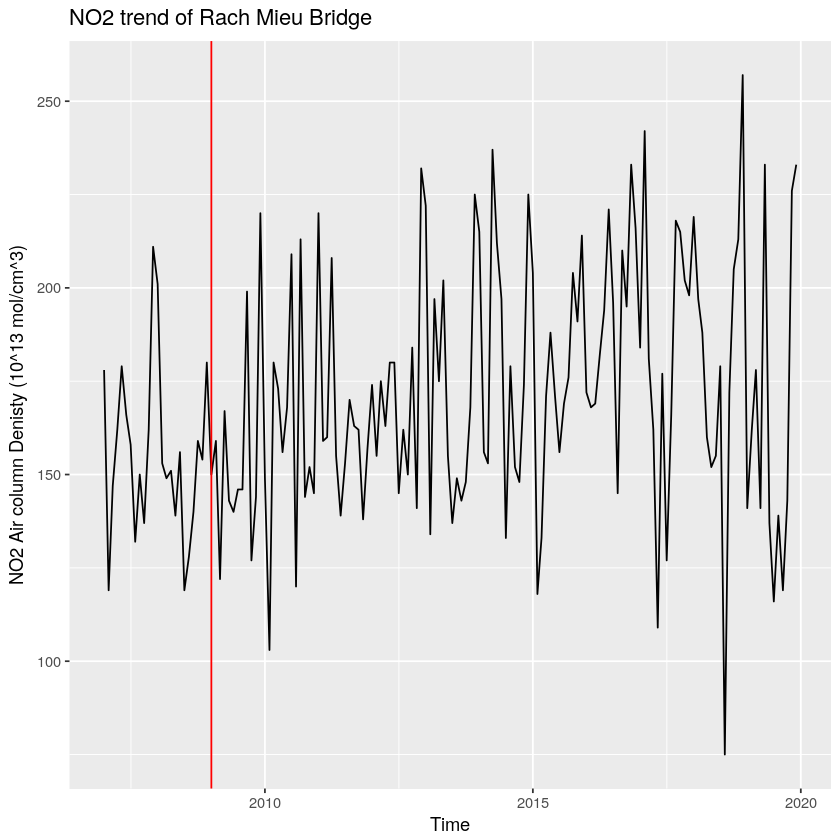

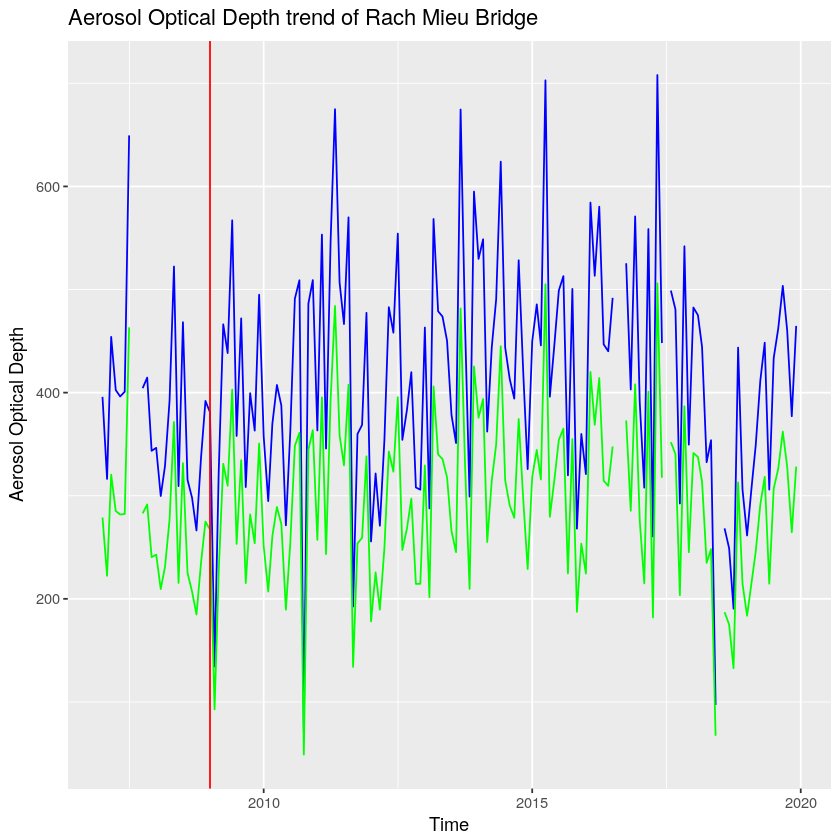

In [82]:
datarm <- datab[datab$name == "Rach Mieu", ]
data4rm <- data47[data47$name == "Rach Mieu", ]
data5rm <- data55[data55$name == "Rach Mieu", ]
ggplot(datarm) + 
  geom_line(aes(x = date, y = NO2)) +
  xlab("Time")+
  ylab("NO2 Air column Denisty (10^13 mol/cm^3)")+
  ggtitle("NO2 trend of Rach Mieu Bridge") +
  geom_vline(aes(xintercept = date[25]), color = "red")
ggplot() + 
  geom_line(data = data4rm, aes(x = date, y = mean), color = "blue") +
  geom_line(data = data5rm, aes(x = date, y = mean), color = "green") +
  xlab("Time")+
  ylab("Aerosol Optical Depth")+
  ggtitle("Aerosol Optical Depth trend of Rach Mieu Bridge") +
  geom_vline(data = data4rm, aes(xintercept = date[25]), color = "red")



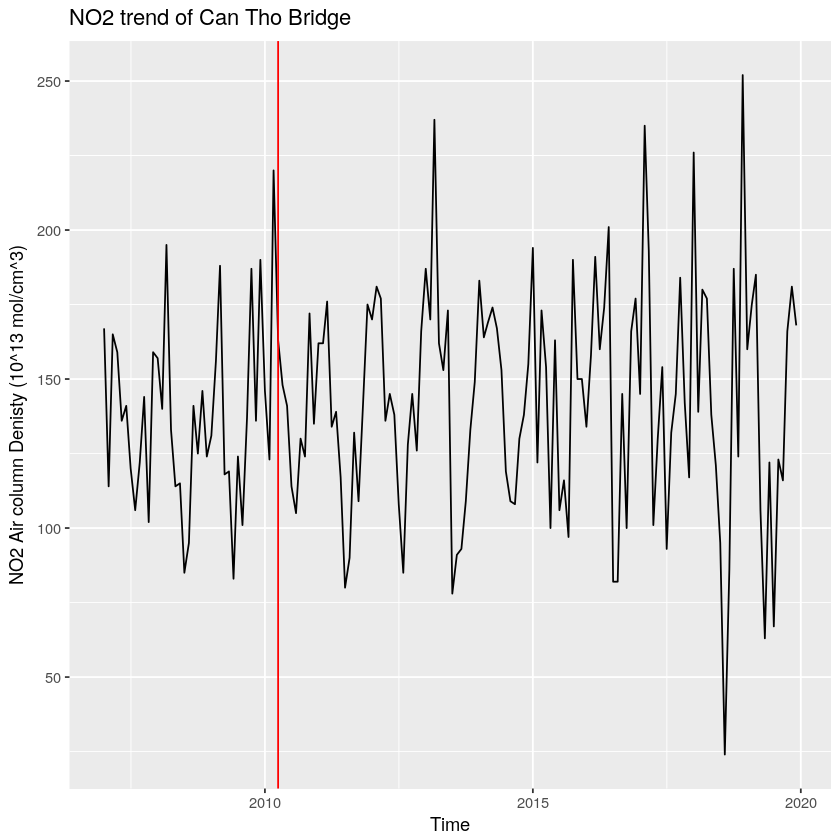

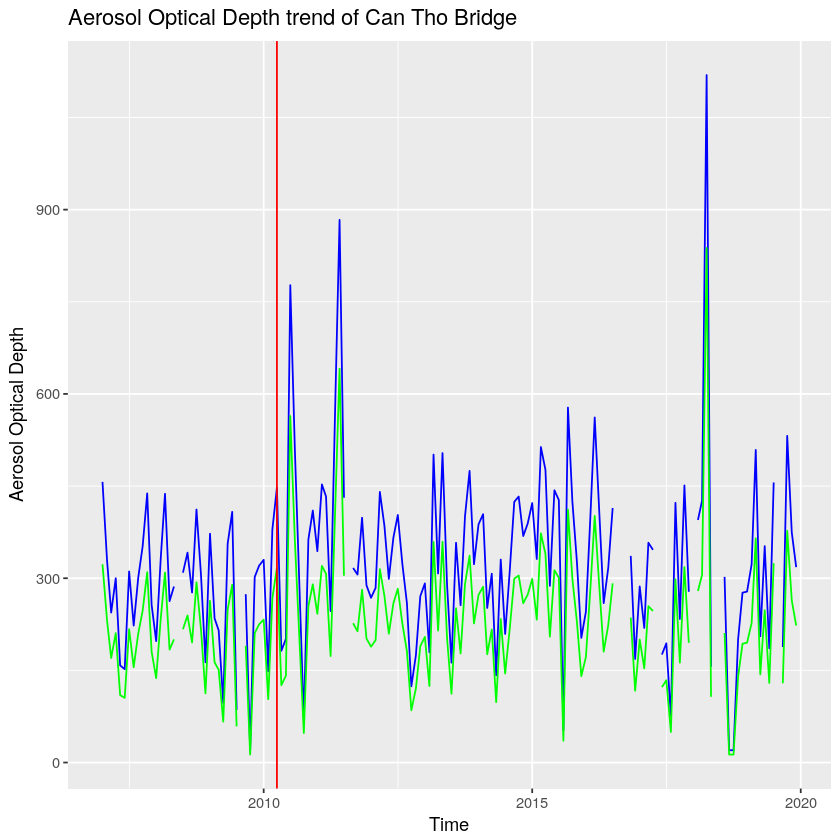

In [83]:
datarm <- datab[datab$name == "Can Tho", ]
data4rm <- data47[data47$name == "Can Tho", ]
data5rm <- data55[data55$name == "Can Tho", ]
ggplot(datarm) + 
  geom_line(aes(x = date, y = NO2)) +
  xlab("Time")+
  ylab("NO2 Air column Denisty (10^13 mol/cm^3)")+
  ggtitle("NO2 trend of Can Tho Bridge") +
  geom_vline(aes(xintercept = date[40]), color = "red")
ggplot() + 
  geom_line(data = data4rm, aes(x = date, y = mean), color = "blue") +
  geom_line(data = data5rm, aes(x = date, y = mean), color = "green") +
  xlab("Time")+
  ylab("Aerosol Optical Depth")+
  ggtitle("Aerosol Optical Depth trend of Can Tho Bridge") +
  geom_vline(data = data4rm, aes(xintercept = date[40]), color = "red")

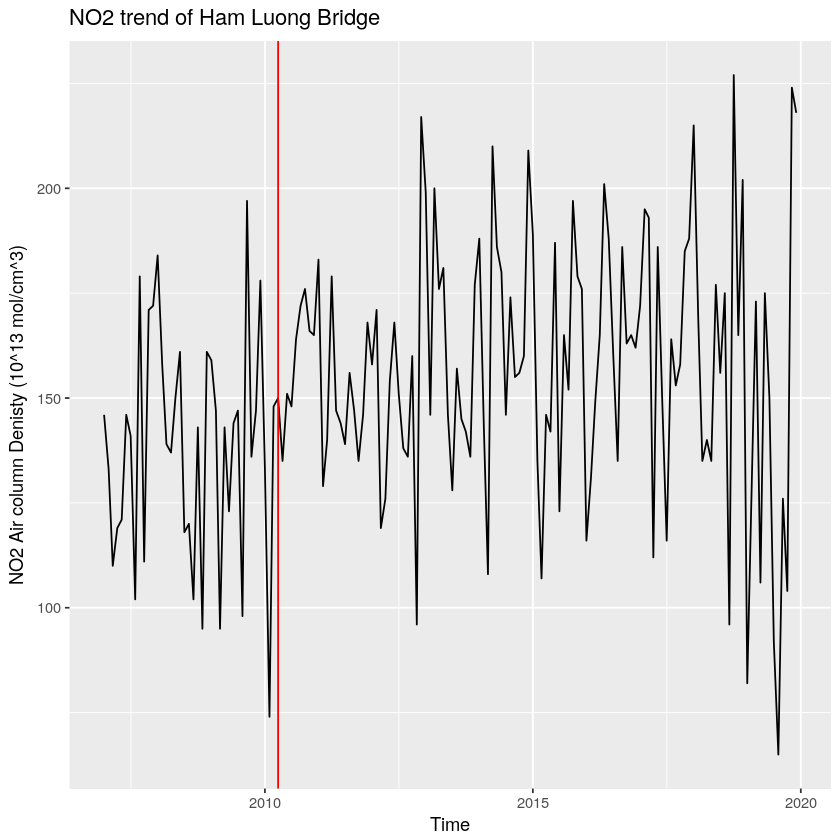

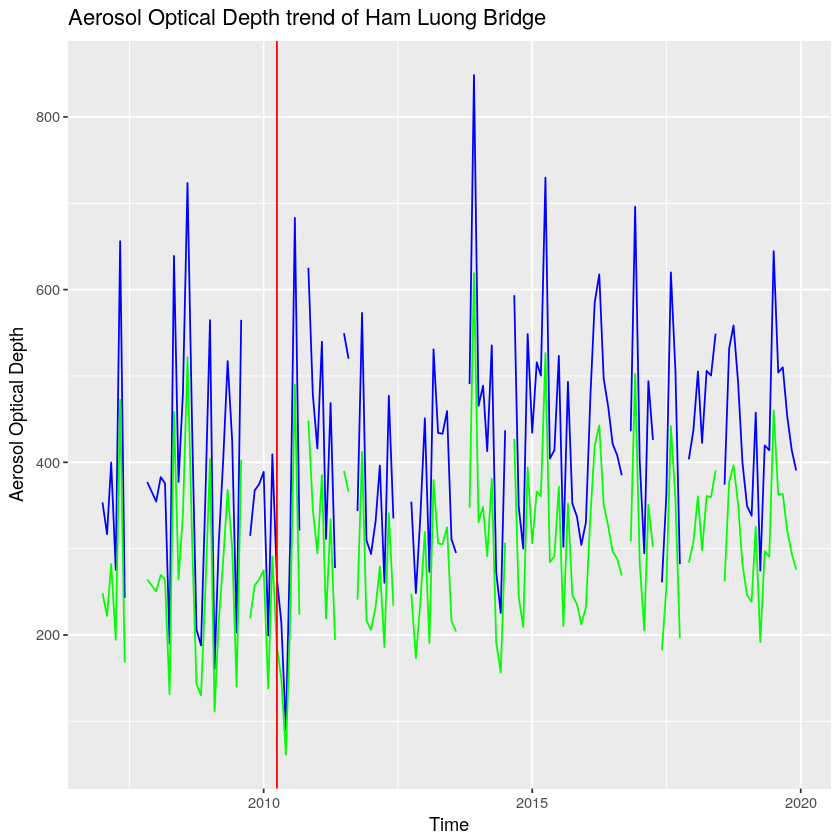

In [84]:
datarm <- datab[datab$name == "Ham Luong", ]
data4rm <- data47[data47$name == "Ham Luong", ]
data5rm <- data55[data55$name == "Ham Luong", ]
ggplot(datarm) + 
  geom_line(aes(x = date, y = NO2)) +
  xlab("Time")+
  ylab("NO2 Air column Denisty (10^13 mol/cm^3)")+
  ggtitle("NO2 trend of Ham Luong Bridge") +
  geom_vline(aes(xintercept = date[40]), color = "red")
ggplot() + 
  geom_line(data = data4rm, aes(x = date, y = mean), color = "blue") +
  geom_line(data = data5rm, aes(x = date, y = mean), color = "green") +
  xlab("Time")+
  ylab("Aerosol Optical Depth")+
  ggtitle("Aerosol Optical Depth trend of Ham Luong Bridge") +
  geom_vline(data = data4rm, aes(xintercept = date[40]), color = "red")

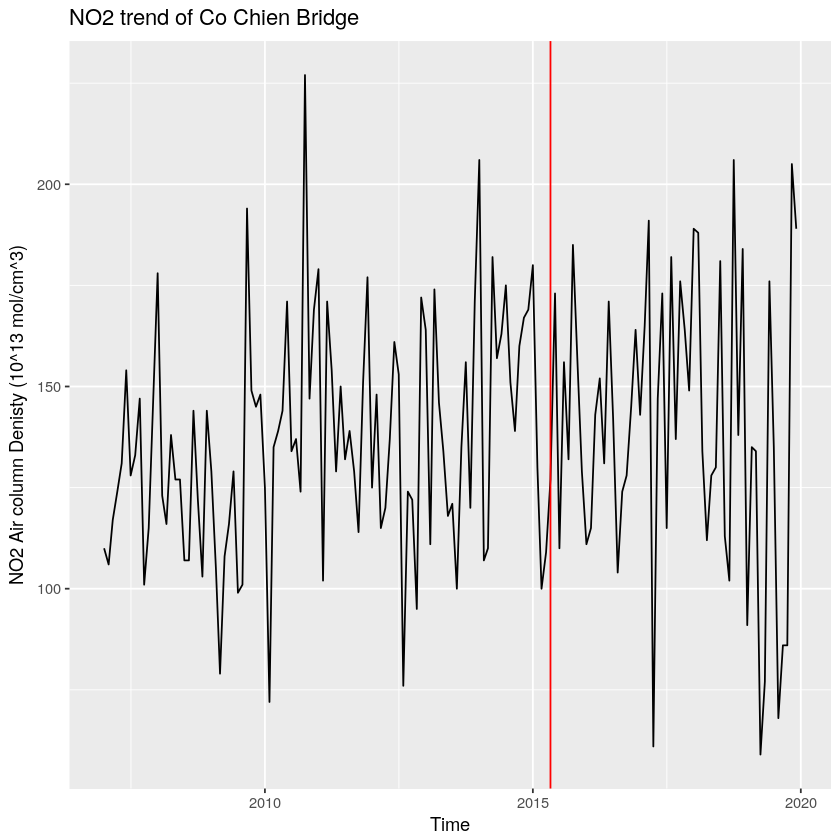

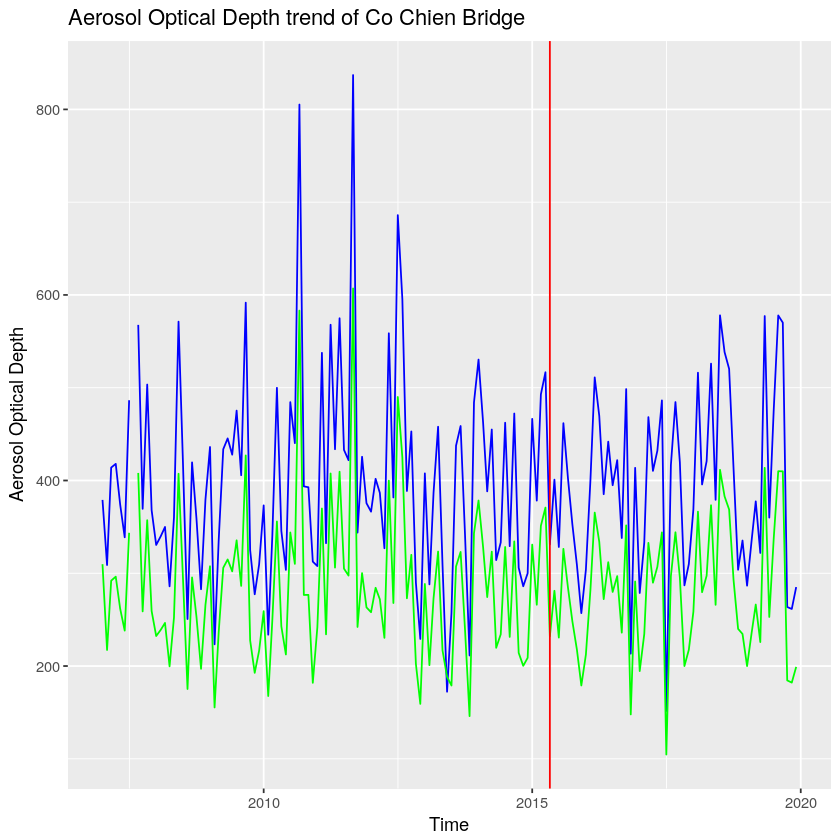

In [85]:
datarm <- datab[datab$name == "Co Chien", ]
data4rm <- data47[data47$name == "Co Chien", ]
data5rm <- data55[data55$name == "Co Chien", ]
ggplot(datarm) + 
  geom_line(aes(x = date, y = NO2)) +
  xlab("Time")+
  ylab("NO2 Air column Denisty (10^13 mol/cm^3)")+
  ggtitle("NO2 trend of Co Chien Bridge") +
  geom_vline(aes(xintercept = date[12*8+5]), color = "red")
ggplot() + 
  geom_line(data = data4rm, aes(x = date, y = mean), color = "blue") +
  geom_line(data = data5rm, aes(x = date, y = mean), color = "green") +
  xlab("Time")+
  ylab("Aerosol Optical Depth")+
  ggtitle("Aerosol Optical Depth trend of Co Chien Bridge") +
  geom_vline(data = data4rm, aes(xintercept = date[12*8+5]), color = "red")

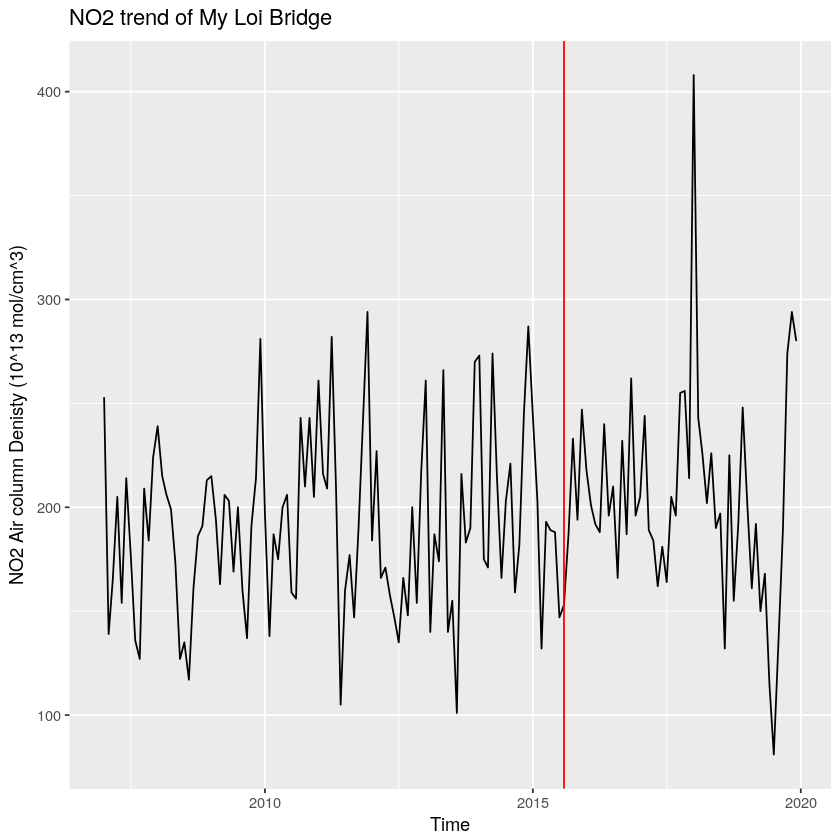

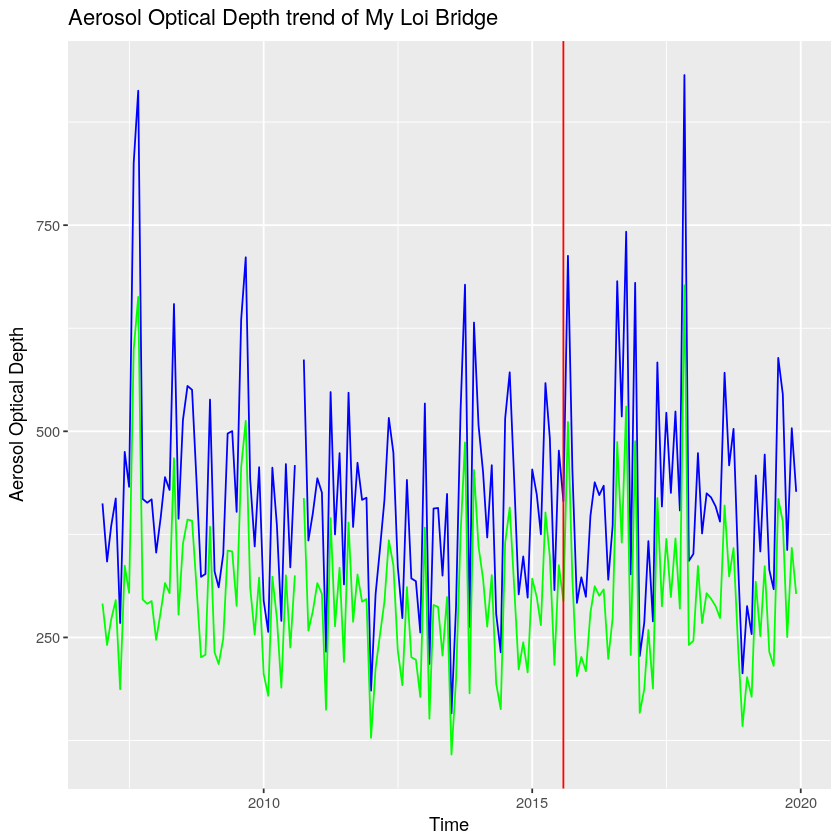

In [86]:
datarm <- datab[datab$name == "My Loi", ]
data4rm <- data47[data47$name == "My Loi", ]
data5rm <- data55[data55$name == "My Loi", ]
ggplot(datarm) + 
  geom_line(aes(x = date, y = NO2)) +
  xlab("Time")+
  ylab("NO2 Air column Denisty (10^13 mol/cm^3)")+
  ggtitle("NO2 trend of My Loi Bridge") +
  geom_vline(aes(xintercept = date[12*8+8]), color = "red")
ggplot() + 
  geom_line(data = data4rm, aes(x = date, y = mean), color = "blue") +
  geom_line(data = data5rm, aes(x = date, y = mean), color = "green") +
  xlab("Time")+
  ylab("Aerosol Optical Depth")+
  ggtitle("Aerosol Optical Depth trend of My Loi Bridge") +
  geom_vline(data = data4rm, aes(xintercept = date[12*8+8]), color = "red")

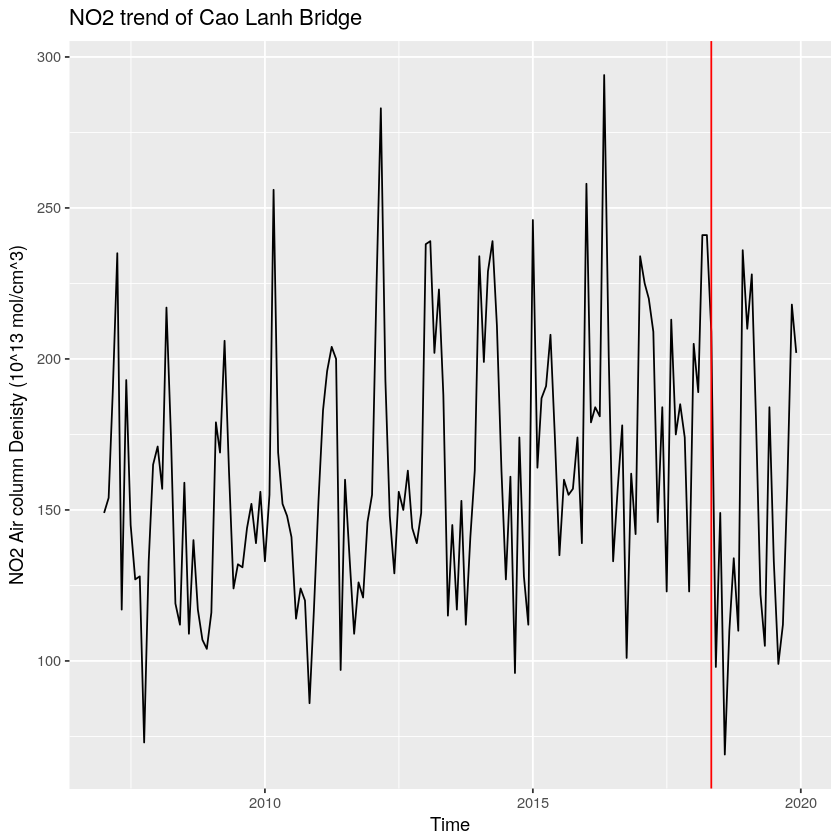

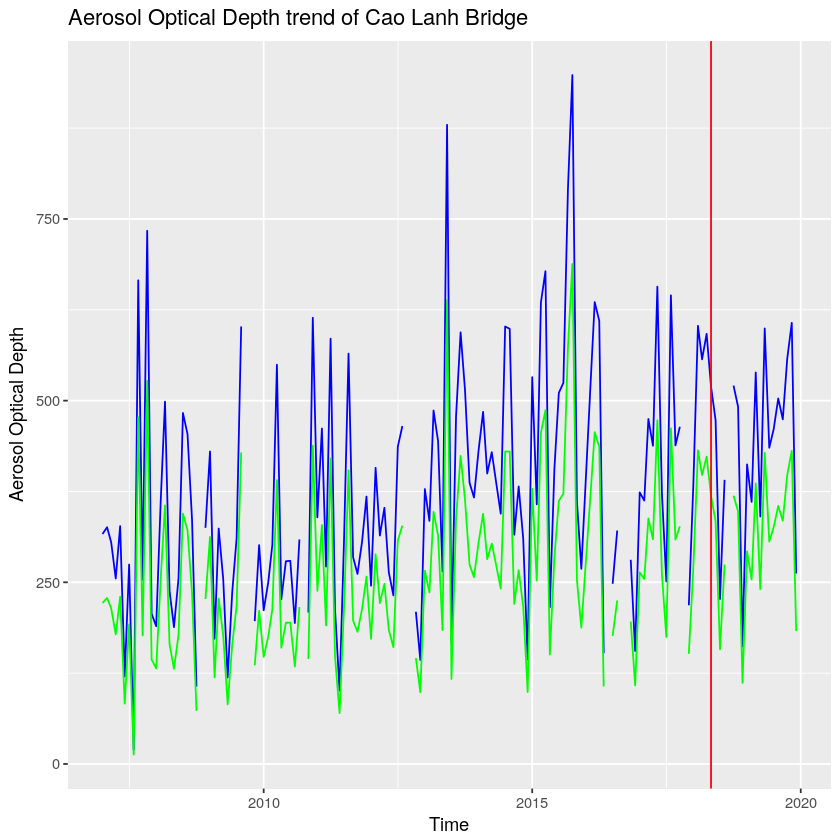

In [87]:
datarm <- datab[datab$name == "Cao Lanh", ]
data4rm <- data47[data47$name == "Cao Lanh", ]
data5rm <- data55[data55$name == "Cao Lanh", ]
ggplot(datarm) + 
  geom_line(aes(x = date, y = NO2)) +
  xlab("Time")+
  ylab("NO2 Air column Denisty (10^13 mol/cm^3)")+
  ggtitle("NO2 trend of Cao Lanh Bridge") +
  geom_vline(aes(xintercept = date[12*11+5]), color = "red")
ggplot() + 
  geom_line(data = data4rm, aes(x = date, y = mean), color = "blue") +
  geom_line(data = data5rm, aes(x = date, y = mean), color = "green") +
  xlab("Time")+
  ylab("Aerosol Optical Depth")+
  ggtitle("Aerosol Optical Depth trend of Cao Lanh Bridge") +
  geom_vline(data = data4rm, aes(xintercept = date[12*11+5]), color = "red")

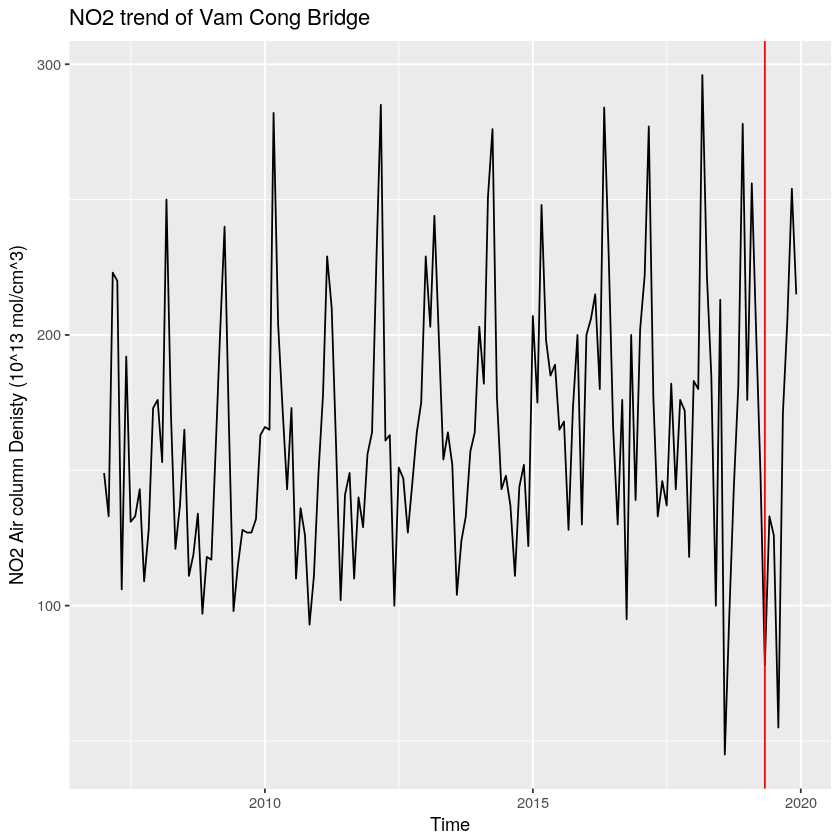

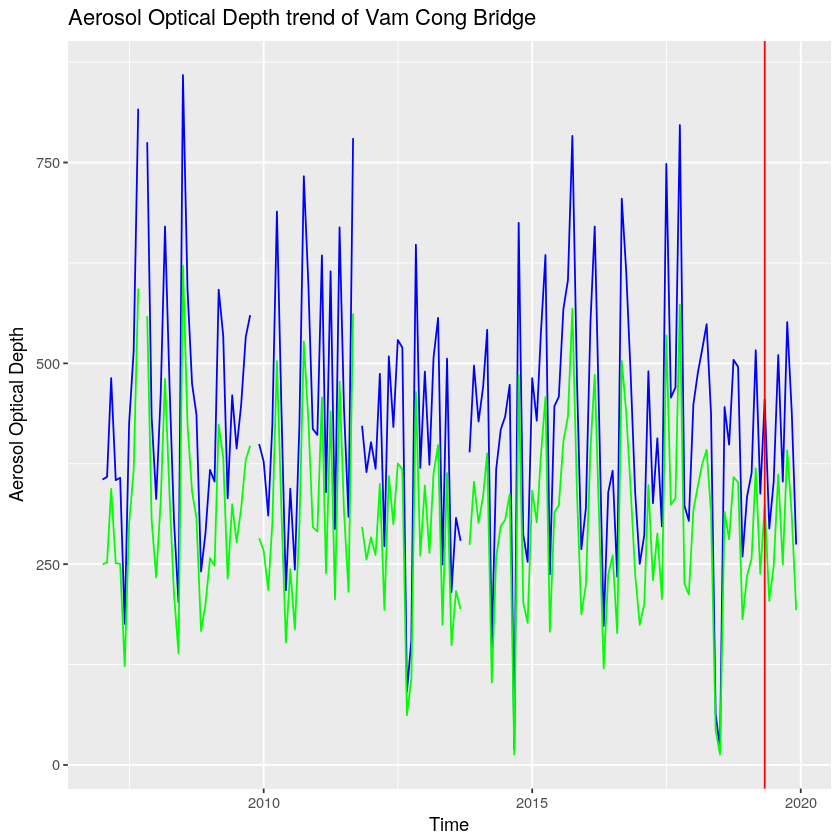

In [88]:
datarm <- datab[datab$name == "Vam Cong", ]
data4rm <- data47[data47$name == "Vam Cong", ]
data5rm <- data55[data55$name == "Vam Cong", ]
ggplot(datarm) + 
  geom_line(aes(x = date, y = NO2)) +
  xlab("Time")+
  ylab("NO2 Air column Denisty (10^13 mol/cm^3)")+
  ggtitle("NO2 trend of Vam Cong Bridge") +
  geom_vline(aes(xintercept = date[12*12+5]), color = "red")
ggplot() + 
  geom_line(data = data4rm, aes(x = date, y = mean), color = "blue") +
  geom_line(data = data5rm, aes(x = date, y = mean), color = "green") +
  xlab("Time")+
  ylab("Aerosol Optical Depth")+
  ggtitle("Aerosol Optical Depth trend of Vam Cong Bridge") +
  geom_vline(data = data4rm, aes(xintercept = date[12*12+5]), color = "red")